# DBSCAN의 개념

DBSCAN은 Density-Based Spatial Clustering of Applications with Noise의 약자로, 한국말로 풀이하면 노이즈를 적용한 밀도 기반 공간 클러스터링이라고 해석할 수 있다. 한마디로 Density-Based 알고리즘이기 때문에 "밀도 기반"으로 클러스터링을 하게 된다는 의미이다.

# K-Means의 문제점
DBSCAN을 이해하기에 앞서, 대표적인 클러스터 알고리즘은 K-Means를 떠올려보자. K-Means는 이상치(outlier)가 있어도 이상치 값을 이해할 수 없으며, 이상치가 심지어 K-Means를 자신의 주변으로 끌고 와서 Centroid값을 바꿔버릴 수 있다. 이는 클러스터의 품질을 심하게 망칠 수 있는 critical risk이다.

K-Means는 이 문제를 극복하기 위해서 클러스터링을 하기 전에 outlier의 존재를 인지해야 하며, 클러스터의 품질을 이해 이상치를 제거해야 하는 과정이 필요할 수 있다.

# DBSCAN의 설정
DBSCAN은 특정 요소가 클러스터에 속하는 경우 해당 클러스터내 다른 많은 요소와 가까운 위치에 있어야 한다는 아이디어를 전제로 하며, 이계산을 위해 직경(Radius)와 최소 요소(Minimum points)를 사용한다.

# R(Radius of neighborhood)
Radius(R)의 특정 데이터 요소를 기준으로 반경을 정한다. 이를 밀도 영역(dense area)이라고 한다.

# M(Min number of neighbors)
M은 핵심 요소를 지정하기 위해 핵심 요소 주변으로 요소개 몇개 있는지 지정한다.

데이터세트의 각 요소는 핵심(core), 경계(border), 이상치 요소(outlier point)로 구분된다.



# DBSCAN의 프로세스
Fig.1 처럼 총 요소가 10개가 존재한다고 해보자, K-Means였다면 여기서 클러스터를 몇개 할 지 K개를 설정하고, 그 K개에 맞게 어떻게든 클러스터링 구현했을 것이다. DBSCAN의 장점은 우선 K개를 설정할 필요가 없다는 것이다.

Fig.2에서 붉은색으로 칠한 요소를 기준으로 R의 값을 반영해보면, Radius에 겹치는 요소가 3개가 있다. 여기 M=3이라고 한다면, 현재 기준으로 되는 요소는 core point가 되며, 나머지 Radius안에 겹치는 요소들은 border point가 된다.

Fig.3을 보면 M=3인 요소를 찾아보니, 우측의 중앙에 있는 요소도 core point이기 때문에 위와 같은 모습의 클러스터가 만들어졌다.

Fig.4를 보면 검정색으로 표시한 point가 있는데 어느 클러스터에도 속하지 않는 point로 noise point가 되고 곧 outlier로 인식하게 된다. 마지막으로 클러스터간에 radius가 겹치는 구간이 있다면 해당 클러스터는 서로간에 합치게 된다.

Fig.5는 위 알고리즘을 설명하기 쉽게 클러스터별로 color를 다르게하였고, color별로 point 설명을 추가하였다.

최종적으로 위 내용들을 정리하자면, 아래와 같다.

1. 요소별로 R의 크기를 체크하여, 주변의 요소가 몇개 있는지를 탐색한다.
2. R크기안에 M개수 이상의 요소가 존재하면, 해당 요소는 core point가 된다.
3. core point안에 있는 요소는 border point가 된다.
4. core point안에 속하지 못한 요소는 noise point = outlier가 되며 클러스터에서 제외가 된다.
5. core point 사이의 거리가 R안에 속할 경우, 서로 같은 클러스터로 묶이게 된다.

DBSCAN은 Core Point끼리 묶이는 모습 때문에 K-Means와는 전혀 다른 클러스터링을 만들 수 있는데, 아래와 모양의 클러스터가 가능해진다.

위의 데이터를 K-Means로 구현했다면 마치 피자를 자른 모양처럼 클러스터가 되었을텐데 DBSCAN은 이렇게 땅따먹기 형태로 클러스터가 되기에 전혀 다른 클러스터를 구현할 수 있다.

DBSCAN을 구현하고 싶다면 아래 포스팅을 보도록 하자.

https://needjarvis.tistory.com/720

# DBSCAN 클러스터링 예제
## 라이브러리

In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

라이브러리는 make_blobs을 사용하여, 좌표 샘플들을 만들어 내고 전처리 과정에 스케일러를 사용하였다. 그리고 클러스터링의 성능을 측정하기 위해 metrics를 라이브러리에 추가하였다.

## 샘플생성

In [3]:
# Generate Sample
centers = [[1,1], [-1, -1], [1, -1]]
X, y = make_blobs(
    n_samples=750,
    centers = centers,
    cluster_std=0.4,
    random_state=0
)
X = StandardScaler().fit_transform(X)

## 학습수행

In [6]:
epsilon = 0.3 # R 역할, 반지름 지정
minimumSamples = 7 # 최소 7개 요소
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

반지름 역할 즉, Radius를 설정하는 epsilon과 core point의 기존이 되는 minimumSamples를 지정한다.

eps는 float로 설정해야 하며, default값은 0.5이다.
min_samples의 경우 default값은 5이다.

## 레이블의 값을 bool 배열로 변경

In [11]:
# db의 레이블을 사용하여 bool 배열을 생성, outlier는 false로 변경
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

K-Means와 다르게 outlier를 찾아내기 때문에, bool배열로 변경하는 과정이 존재한다.

## DBSCAN 성능 평가

In [15]:
# 레이블에 있는 클러스터 수, 노이즈가 있을 경우 무시
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('n_clsuters_ ->', n_clusters_)
print('noise count ->', n_noise)
print('Homogeneity -> %0.3f' % metrics.homogeneity_score(y, labels)) # 동질성
print('Completeness: %0.3f' % metrics.completeness_score(y, labels)) # 완전성

n_clsuters_ -> 3
noise count -> 13
Homogeneity -> 0.948
Completeness: 0.892


## 시각화

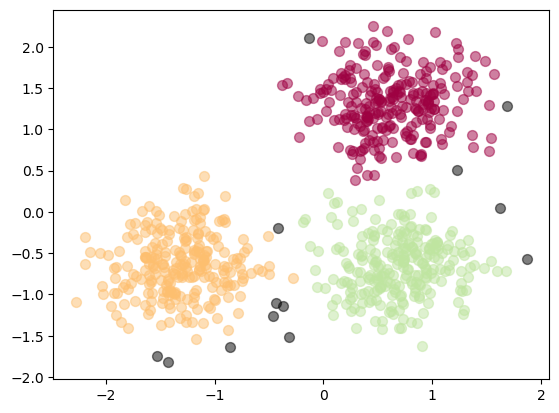

In [29]:
# 레이블 반복을 set으로 변환후 제거
unique_labels= set(labels)

# 클러스터들의 색상 부여
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# DB스캔 Visualization
for k, col in zip(unique_labels, colors):
    if k == -1:
        # black used for noise
        col = 'k'
        
    class_member_mask = (labels == k)
    
    # 클러스터들의 데이터를 화면에 그린다.
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker=u'o', alpha=0.5)
    
    # Outlier를 그린다.
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker=u'o', alpha=0.5)
plt.show()

위 시각화 결과를 보면 클러스터에 멀어진 검정색 noise point들이 보일 것이다. 예를 들어, 노란색 클러스와 초록색 클러스터 사이에 있는 point는 
어느 클러스터에 속해야 할지 애매해 질 수 있는데 이럴 땐 noise point=outlier로 처리하는 것이 어떻게든 클러스터로 만드는 다른 클러스(ex: K-means) 알고리즘과는 다른 점이다.